In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [22]:
url  = "https://calmcode.io/static/data/fish.csv"
df = pd.read_csv(url)
print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
model= scaler.fit(df.iloc[:, 1:])
data=model.transform(df.iloc[:, 1:])
X = data[:,1:]
y = data[:,0]
print(y)

[0.14666667 0.17575758 0.20606061 0.22       0.26060606 0.27272727
 0.3030303  0.23636364 0.27272727 0.3030303  0.28787879 0.3030303
 0.3030303  0.20606061 0.36363636 0.36363636 0.42424242 0.42424242
 0.36969697 0.39393939 0.34848485 0.41515152 0.37575758 0.41212121
 0.42424242 0.43939394 0.43636364 0.43272727 0.51515152 0.60606061
 0.55757576 0.57878788 0.56060606 0.59090909 0.57575758 0.02424242
 0.04181818 0.04727273 0.05272727 0.07272727 0.         0.06666667
 0.07272727 0.09090909 0.08787879 0.0969697  0.08484848 0.0969697
 0.10242424 0.09757576 0.12121212 0.10909091 0.17575758 0.16484848
 0.23636364 0.16363636 0.16363636 0.18545455 0.32727273 0.48484848
 0.60606061 0.03333333 0.03636364 0.05454545 0.07272727 0.09090909
 0.08484848 0.1030303  0.08787879 0.12121212 0.16545455 0.18181818
 0.00357576 0.01939394 0.02424242 0.03121212 0.04242424 0.06060606
 0.04727273 0.04848485 0.05151515 0.05151515 0.06666667 0.06969697
 0.07575758 0.07878788 0.07272727 0.07272727 0.07878788 0.081818

In [24]:
species = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=species, test_size=0.2, random_state=0)
print(X_test)

[[1.94174757e-01 1.92727273e-01 2.11148649e-01 3.86787087e-01
  2.63658660e-01]
 [5.80582524e-01 5.92727273e-01 6.26689189e-01 9.81333364e-01
  8.03408322e-01]
 [5.74757282e-01 5.74545455e-01 5.69256757e-01 5.45987486e-01
  7.86874154e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22653030e-02
  5.08006315e-02]
 [4.64077670e-01 4.65454545e-01 5.13513514e-01 8.27995310e-01
  6.09325665e-01]
 [3.57281553e-01 3.56363636e-01 3.47972973e-01 3.53598087e-01
  4.44942490e-01]
 [4.69902913e-01 4.65454545e-01 4.89864865e-01 2.30976400e-01
  4.38430311e-01]
 [1.68932039e-01 1.74545455e-01 1.75675676e-01 2.02802317e-01
  3.20534506e-01]
 [1.94174757e-01 1.89090909e-01 2.09459459e-01 2.23303112e-01
  2.61727560e-01]
 [4.75728155e-01 4.74545455e-01 4.67905405e-01 4.94996692e-01
  7.52692264e-01]
 [4.56310680e-01 4.56363636e-01 5.05067568e-01 7.39781526e-01
  6.59675237e-01]
 [3.90291262e-01 3.92727273e-01 4.42567568e-01 6.35083524e-01
  5.13419035e-01]
 [3.76699029e-01 3.69090909e-01 3.597972

In [25]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(5, 1)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [26]:
linear_model = LinearRegressionModel()
X_train = torch.tensor(X_train).to(torch.float32)
y_train = torch.tensor(y_train).to(torch.float32)
X_test = torch.tensor(X_test).to(torch.float32)
y_test = torch.tensor(y_test).to(torch.float32)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 0.01)

In [27]:

error = []
for epoch in range(1000):
 
    # Forward pass: Compute predicted y by passing 
    # x to the model
    linear_model.train()
    optimizer.zero_grad()
    pred_y = linear_model(X_train).squeeze()
    loss = criterion(pred_y, y_train)
    loss.backward()
    error.append(loss.item())
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 9, loss 0.14693614840507507
epoch 19, loss 0.07948874682188034
epoch 29, loss 0.04854651913046837
epoch 39, loss 0.034149330109357834
epoch 49, loss 0.027259228751063347
epoch 59, loss 0.023783529177308083
epoch 69, loss 0.02186855673789978
epoch 79, loss 0.02067442052066326
epoch 89, loss 0.019820265471935272
epoch 99, loss 0.01913307048380375
epoch 109, loss 0.018533963710069656
epoch 119, loss 0.017986711114645004
epoch 129, loss 0.017474401742219925
epoch 139, loss 0.016988905146718025
epoch 149, loss 0.016526076942682266
epoch 159, loss 0.016083605587482452
epoch 169, loss 0.015660015866160393
epoch 179, loss 0.015254237689077854
epoch 189, loss 0.014865401200950146
epoch 199, loss 0.014492743648588657
epoch 209, loss 0.014135556295514107
epoch 219, loss 0.013793187215924263
epoch 229, loss 0.013465004973113537
epoch 239, loss 0.013150421902537346
epoch 249, loss 0.012848862446844578
epoch 259, loss 0.01255978737026453
epoch 269, loss 0.012282670475542545
epoch 279, loss 0.0

epoch 289, loss 0.011762339621782303
epoch 299, loss 0.011518188752233982
epoch 309, loss 0.011284123174846172
epoch 319, loss 0.0110597163438797
epoch 329, loss 0.010844570584595203
epoch 339, loss 0.010638299398124218
epoch 349, loss 0.010440530255436897
epoch 359, loss 0.010250906459987164
epoch 369, loss 0.010069092735648155
epoch 379, loss 0.009894761256873608
epoch 389, loss 0.009727598167955875
epoch 399, loss 0.009567308239638805
epoch 409, loss 0.009413601830601692
epoch 419, loss 0.009266206994652748
epoch 429, loss 0.009124858304858208
epoch 439, loss 0.008989304304122925
epoch 449, loss 0.008859304711222649
epoch 459, loss 0.008734626695513725
epoch 469, loss 0.008615050464868546
epoch 479, loss 0.008500359952449799
epoch 489, loss 0.008390356786549091
epoch 499, loss 0.008284843526780605
epoch 509, loss 0.008183633908629417
epoch 519, loss 0.008086546324193478
epoch 529, loss 0.00799341220408678
epoch 539, loss 0.00790406297892332
epoch 549, loss 0.00781834777444601
epoch 

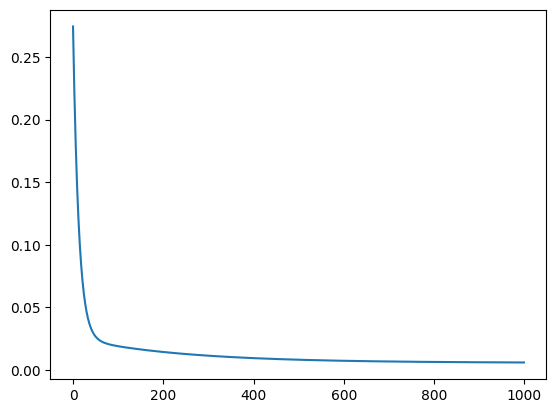

In [28]:
plt.plot(error)
plt.show()

In [29]:
[w, b] = linear_model.parameters()
print("The coefficient is ", w)
print("The intercept is ", b)

The coefficient is  Parameter containing:
tensor([[0.0531, 0.0830, 0.4546, 0.0809, 0.2810]], requires_grad=True)
The intercept is  Parameter containing:
tensor([-0.1397], requires_grad=True)


In [30]:
linear_model.eval()
y_pred_train = torch.flatten(linear_model(X_train))
y_pred_test = torch.flatten(linear_model(X_test))

print("The R^2 for training data is ", r2_score(y_train, y_pred_train.detach().numpy()))
print("The R^2 for testing data is ", r2_score(y_test, y_pred_test.detach().numpy()))

The R^2 for training data is  0.8816119432449341
The R^2 for testing data is  0.7965866923332214
